# Fourier Series - examples 
(adapter from CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh)



Chapter 13 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Understand how to use Fourier series to express a periodic function
- Understand how to get the Fourier coefficients for the series

## Fourier Series

Several times during the course, we have discussed methods to approximate complicated functions using sums of simple functions:
- Taylor / Maclaurin series
- Power series for differential equations

A Taylor or Maclaurin series work well for approximating a function *around a particular point*.

**What if you have a periodic function?**

For example, when solving the classical wave equation or plucking a string, we get a solution like:

$$
\begin{aligned}
h(x, t) &=\sum_{n=1}^{\infty} X_{n}(x) T_{n}(t) \\
&=\sum_{n=1}^{\infty} b_{n} \sin \left[\frac{n \pi}{L} x\right] \times\left[c_{n} \cos \left(\frac{n \pi}{L} v t\right)+d_{n} \sin \left(\frac{n \pi}{L} v t\right)\right] \\
&=\sum_{n=1}^{\infty} \sin \left[\frac{n \pi}{L} x\right]\left[s_{n} \cos \left(\omega_{n} t\right)+t_{n} \sin \left(\omega_{n} t\right)\right]
\end{aligned}
$$

<div class="alert alert-block alert-success">

We can approximate periodic functions using a **Fourier series**: a sum of sine and cosine functions
    
$$
f(x) \approx \frac{a_{0}}{2}+\sum_{n=1}^{\infty} a_{n} \cos \left(\frac{2 \pi n x}{L}\right)+\sum_{n=1}^{\infty} b_{n} \sin \left(\frac{2 \pi n x}{L}\right)
$$
    
where f(x) is periodic from $-\infty .. \infty$ with wavelength period L
    
</div>

This decomposition is also known as *harmonic analysis* - to find the appropriate coefficients $a_n$ and $b_n$ .. just like with a Taylor series.

We do that by determining the *overlap* of the function f(x) and each of the component sine or cosine functions that make up the "basis" of the Fourier series.

### Basics

What do we mean by overlap?

Let's say we just had a simple sine function:

<img src="./images/sine.png" width="350" />

Obviously, we'd want the series to only include one term - all the other coefficients would be zero.

Similarly, if we had some combination of sine and cosine:

<img src="./images/sine-cos2x.png" width="350" />

This was simply $\sin x - \cos 2x$

So we'd want to include those two terms and remove all the other coefficients.

If we limit our analysis at the moment from $-\pi$ to $\pi$, we'll get:

$$
a_{n}=\frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos (n x) d x \quad b_{n}=\frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin (n x) d x
$$

Let's check this out with our example:

$$
f(x) = \sin x + \cos 2x
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high-res images where supported


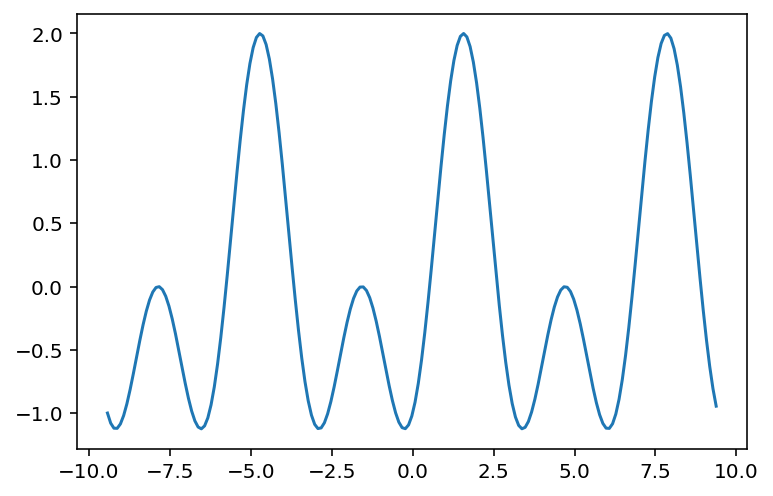

In [2]:
x = np.arange(-3*np.pi, 3*np.pi, 0.1)
f = np.sin(x) - np.cos(2*x)

plt.plot(x, f)
plt.show()

So we're going to plot a few of the $f(x) \cdot \cos nx$ first:

(-3.141592653589793, 3.141592653589793)

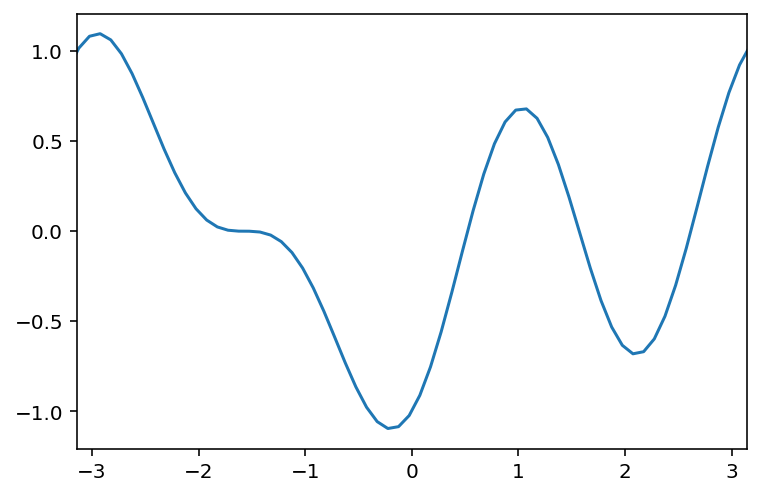

In [3]:
plt.plot(x, f*np.cos(x))
plt.xlim(-np.pi, np.pi)

We will check this, but the area *above* $x = 0$ and *below* $x = 0$ looks about equal.

What about $\cos 2x$

(-3.141592653589793, 3.141592653589793)

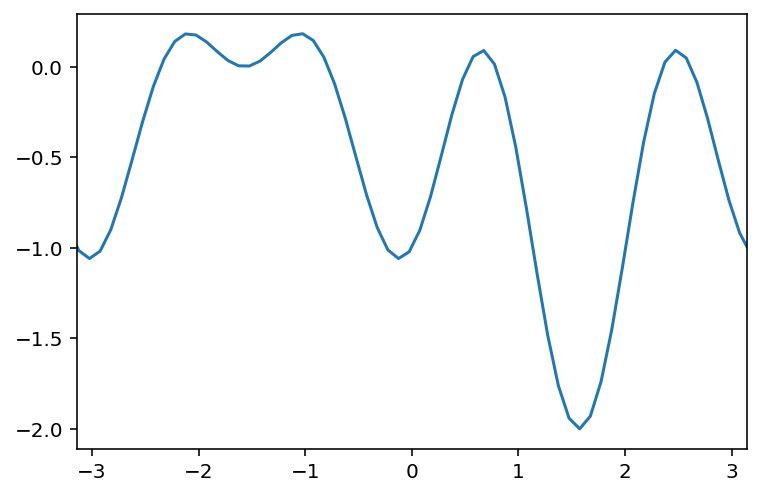

In [4]:
plt.plot(x, f*np.cos(2*x))
plt.xlim(-np.pi, np.pi)

It's not hard to see that the area below the curve is much larger than above the curve. (It should be, since we constructed $f(x) = \sin x - \cos 2x$.)

If you remember, we can use `scipy.integrate.simps(y, x)` to perform Simpson's rule for numeric integration.

In [5]:
from scipy.integrate import simps

x = np.arange(-np.pi, np.pi, 0.01)
f = np.sin(x) - np.cos(2*x)

for n in range(1, 5):
    print(n, simps(f*np.cos(n*x), x))

1 -0.0031802071810718563
2 -3.1384124625138634
3 -0.0031801642411633663
4 0.0031801266874790513


Notice that all $\int f \cdot \cos nx dx = 0$ *except* for $\int f \cdot \cos 2x dx$

The same thing is, of course, true for the sine coefficients:

In [6]:
x = np.arange(-np.pi, np.pi, 0.01)
f = np.sin(x) - np.cos(2*x)

for n in range(1, 5):
    print(n, simps(f*np.sin(n*x), x))

1 3.141597715853516
2 -1.0124506098829755e-05
3 1.5186705817127333e-05
4 -2.0248841637315884e-05


And of course, you can see for "perfect" overlap, the integral yields $\pi$

That's because:

$$
\int_{-\pi}^{\pi} \cos (n x) \cos (m x) d x=\pi \delta_{n m}
$$

where $\delta_{n m}$ is a special function called the Kronecker delta function:

$$
\delta_{n m}=\left\{\begin{array}{ll}
1 & n=m \\
0 & n \neq m
\end{array}\right.
$$

Similarly, for sine functions:

$$
\int_{-\pi}^{\pi} \sin (n x) \sin (m x) d x=\pi \delta_{n m}
$$

We can call this **orthogonality** - the overlap integral of a sine function and another sine function will be zero unless they're identical.

There's also the overlap between $\cos x$ and $\sin x$ functions:

$$
\int_{-\pi}^{\pi} \sin (n x) \cos (m x) d x=0
$$

And of course, we need $a_0$ which acts as a constant "shift" along the y-axis.

### Different wavelengths?

Obviously, we evaluated these integrals from $-\pi$ to $\pi$ .. but if the function has a different periodicity, we need to tweak our limits a bit:

$$
-\pi \leq x<\pi \rightarrow-\frac{L}{2} \leq x<\frac{L}{2}
$$

Then each sine and cosine will be:

$$
n x \rightarrow \frac{2 \pi n x}{L}
$$

$$
f(x)=\frac{a_{0}}{2}+\sum_{n=1}^{\infty} a_{n} \cos \left(\frac{2 \pi n x}{L}\right)+\sum_{n=1}^{\infty} b_{n} \sin \left(\frac{2 \pi n x}{L}\right)
$$

and the integrals for the coefficients are:

$$
a_{n}=\frac{2}{L} \int_{-\frac{L}{2}}^{\frac{L}{2}} f(x) \cos \left(\frac{2 \pi n x}{L}\right) d x \quad b_{n}=\frac{2}{L} \int_{-\frac{L}{2}}^{\frac{L}{2}} f(x) \sin \left(\frac{2 \pi n x}{L}\right) d x
$$

Perhaps $x$ has some unit (e.g., Hz, nm, etc.) but $x/L$ will be unitless and we'll be back to the "normalized" dimensionless analysis we performed above.

### Example: Sawtooth Wave

We'll start with a classic example. A sawtooth wave looks like you'd imagine - it goes up diagonally, then drops down and repeats.

We can find the `sawtooth()` function in `scipy.signal` (i.e., a module that includes a variety of signal-processing code.

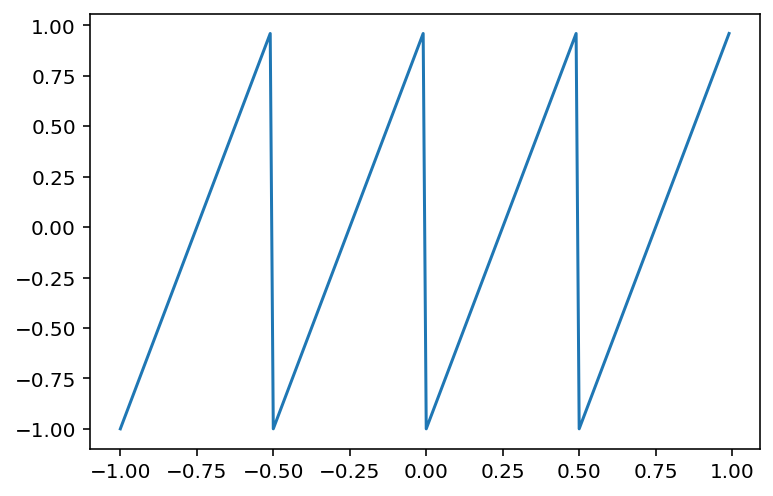

In [7]:
import scipy.signal

t = np.arange(-1, 1, 0.01)
# notice that we're rescaling this to 2*pi / L with L = 1.0
#  and we want 2 full "waves" in 0..1
f = scipy.signal.sawtooth(2 * np.pi * 2 * t)
plt.plot(t, f)
plt.show()

Now let's do the integration.

For simplicity, let's do the $a_n$ terms with cosine first.

In [8]:
L = 1.0
# The integration limits are -L/2 .. L/2
t = np.arange(-L/2, L/2, 0.001) # for proper integration use a tight step
f = scipy.signal.sawtooth(2 * np.pi * 2 * t)

# we're going to save the Fourier coefficients
#  .. but a[0] is going to be zero...
a = [0]

for n in range(1, 7):
    a.append(2*simps(f*np.cos(2*np.pi*n*t/L), t))
    print('cos:', n, a[n])

cos: 1 -4.0131595580748455e-06
cos: 2 -0.0039959473607376434
cos: 3 -4.118442181532062e-06
cos: 4 -0.003995789426539146
cos: 5 -4.329040267781912e-06
cos: 6 -0.003995526148153418


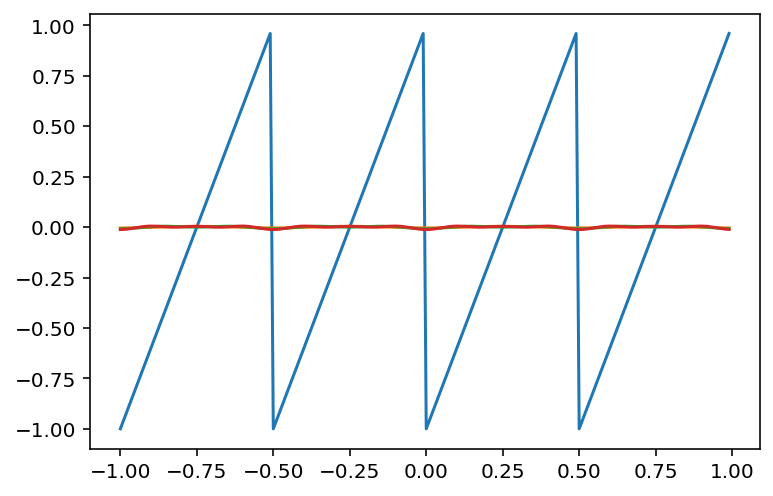

In [9]:
t = np.arange(-1, 1, 0.01) # for plotting
plt.plot(t, scipy.signal.sawtooth(2 * np.pi * 2 * t))

approx2 = a[2]*np.cos(2*np.pi*2*t/L)
plt.plot(t, approx2)

approx4 = approx2 + a[4]*np.cos(4*np.pi*2*t/L)
plt.plot(t, approx4)

approx6 = approx4 + a[6]*np.cos(6*np.pi*2*t/L)
plt.plot(t, approx6)

plt.show()

Notice that the cosine terms are all pretty small...

Let's compute the sine components and see how they handle it.

In [10]:
L = 1.0
t = np.arange(-L/2, L/2, 0.001) # for proper integration L = 1
f = scipy.signal.sawtooth(2 * np.pi * 2 * t)

# we're going to save the Fourier coefficients
#  .. but a[0] is going to be zero...
b = [0]

for n in range(1, 7):
    b.append(2*simps(f*np.sin(2*np.pi*n*t/L), t))
    print('sin:', n, b[n])

sin: 1 -4.180426128918963e-06
sin: 2 -0.6366030338318457
sin: 3 -1.2541602421733477e-05
sin: 4 -0.31827640833212184
sin: 5 -2.090375014628504e-05
sin: 6 -0.21215637206253254


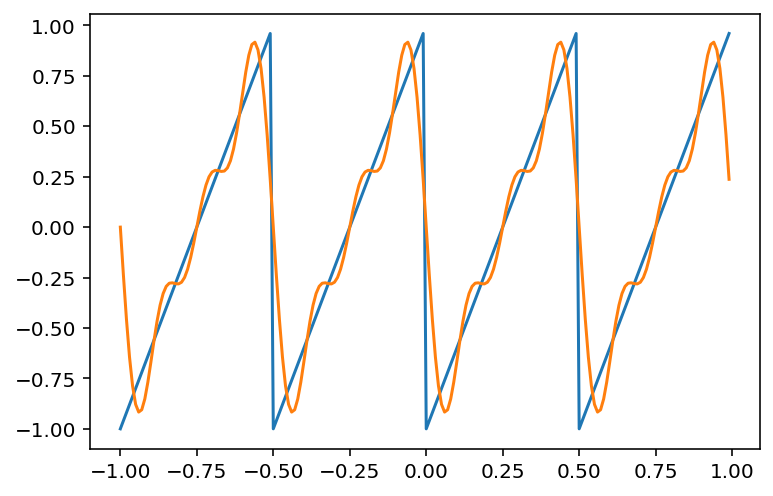

In [11]:
t = np.arange(-1, 1, 0.01) # for plotting
plt.plot(t, scipy.signal.sawtooth(2 * np.pi * 2 * t))

approx2 = b[2]*np.sin(2*np.pi*2*t/L)
#plt.plot(t, approx2)

approx4 = approx2 + b[4]*np.sin(2*np.pi*4*t/L)
#plt.plot(t, approx4)

approx6 = approx4 + b[6]*np.sin(2*np.pi*6*t/L)
plt.plot(t, approx6)

plt.show()

And of course we should add both the cosine and sine components together

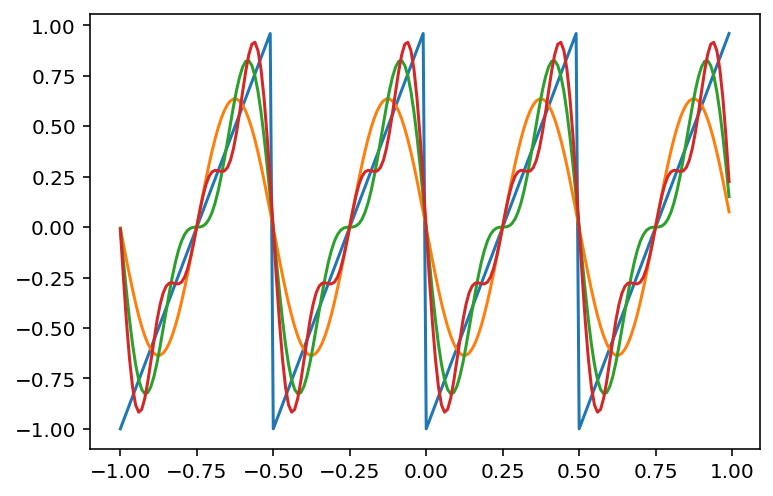

In [12]:
t = np.arange(-1, 1, 0.01) # for plotting
plt.plot(t, scipy.signal.sawtooth(2 * np.pi * 2 * t))

approx2 = a[2]*np.cos(2*np.pi*2*t/L) + b[2]*np.sin(2*np.pi*2*t/L)
plt.plot(t, approx2)

approx4 = approx2 + a[4]*np.cos(2*np.pi*4*t/L) + b[4]*np.sin(2*np.pi*4*t/L)
plt.plot(t, approx4)

approx6 = approx4 + a[6]*np.cos(2*np.pi*6*t/L) + b[6]*np.sin(2*np.pi*6*t/L)
plt.plot(t, approx6)

Obviously, if we wanted, we could add more and more waves to get an even more accurate picture:

In [13]:
L = 1.0
t = np.arange(-L/2, L/2, 0.001) # for proper integration L = 1
f = scipy.signal.sawtooth(2 * np.pi * 2 * t)

# save the coefficients
a = [0]
b = [0]

# get the coefficients for n = 1 .. to 10
for n in range(1, 11):
    a.append(2*simps(f*np.cos(2*np.pi*n*t/L), t))
    b.append(2*simps(f*np.sin(2*np.pi*n*t/L), t))

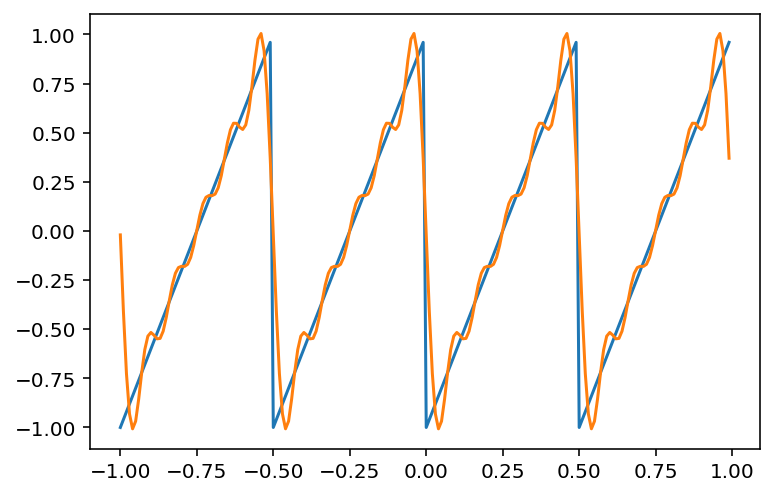

In [14]:
t = np.arange(-1, 1, 0.01) # for plotting
plt.plot(t, scipy.signal.sawtooth(2 * np.pi * 2 * t))

approx = 0.0 # our a0 offset
for n in range(1, 11):
    approx = approx + a[n]*np.cos(2*np.pi*n*t/L) + b[n]*np.sin(2*np.pi*n*t/L)
    
plt.plot(t, approx)
plt.show()

One last plot. Let's see the size of the coefficients as a function of n.

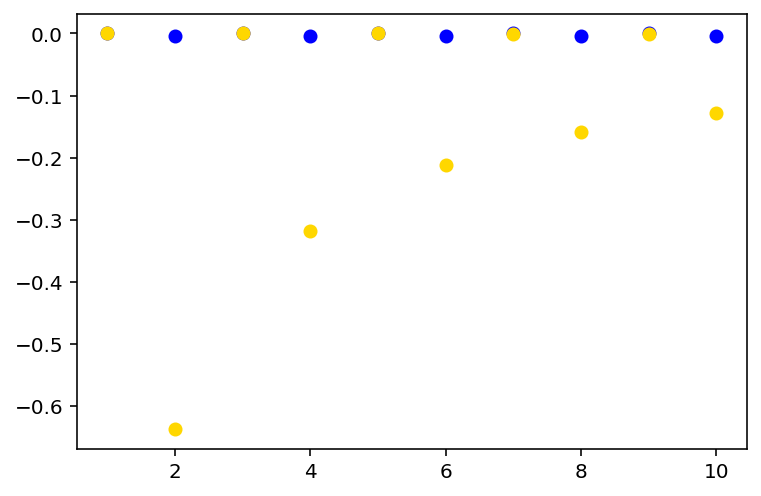

In [15]:
for n in range(1, 11):
    plt.scatter(n, a[n], color='blue')
    plt.scatter(n, b[n], color='gold')

plt.show()

### Example: Square Wave

What about a *really* hard case? There's also the so-called 'square wave' - +/- 1.0 over different intervals.

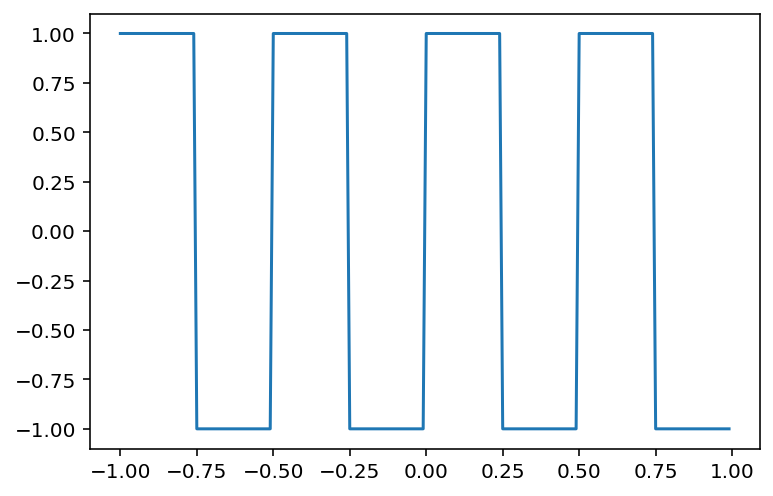

In [16]:
import scipy.signal

t = np.arange(-1, 1, 0.01)
plt.plot(t, scipy.signal.square(2 * np.pi * 2 * t))
plt.show()

We'll do the same integration as before with the sawtooth wave.

In [17]:
L = 1.0
t = np.arange(-L/2, L/2, 0.001) # for proper integration L = 1
f = scipy.signal.square(2 * np.pi * 2 * t)

# save the coefficients
a = [0]
b = [0]

# get the coefficients for n = 1 .. to 15
for n in range(1, 16):
    a.append(2*simps(f*np.cos(2*np.pi*n*t/L), t))
    b.append(2*simps(f*np.sin(2*np.pi*n*t/L), t))
    print(n, 'a:', round(a[n], 4), 'b:', round(b[n], 4))

1 a: 0.0 b: 0.0
2 a: 0.008 b: 1.2732
3 a: 0.0 b: 0.0
4 a: -0.0 b: -0.0
5 a: 0.0 b: 0.0
6 a: 0.008 b: 0.4243
7 a: 0.0 b: 0.0
8 a: -0.0 b: -0.0
9 a: 0.0 b: 0.0
10 a: 0.008 b: 0.2545
11 a: 0.0 b: 0.0
12 a: -0.0 b: -0.0001
13 a: 0.0 b: 0.0001
14 a: 0.008 b: 0.1817
15 a: 0.0 b: 0.0001


Let's plot the cosine contributions first:

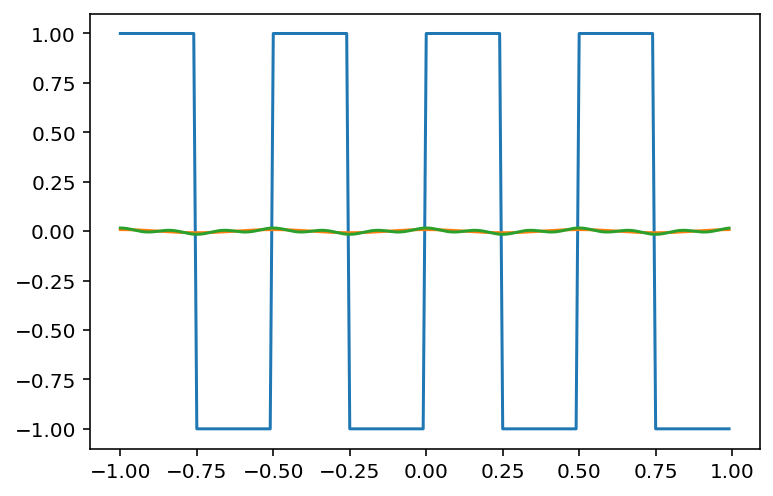

In [18]:
t = np.arange(-1, 1, 0.01) # for plotting
plt.plot(t, scipy.signal.square(2 * np.pi * 2 * t))

approx2 = a[2] * np.cos(2*np.pi*2*t/L)
plt.plot(t, approx2)

approx6 = approx2 + a[6] * np.cos(2*np.pi*6*t/L)
plt.plot(t, approx6)

plt.show()

Now we can plot the sine contributions:

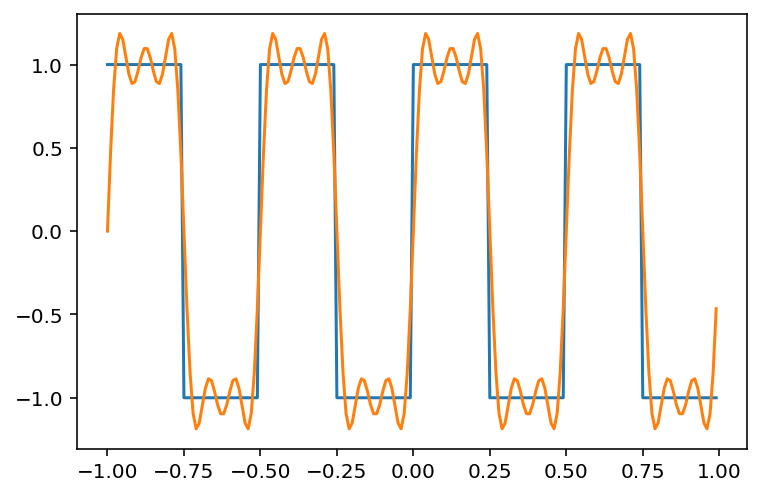

In [19]:
t = np.arange(-1, 1, 0.01) # for plotting
plt.plot(t, scipy.signal.square(2 * np.pi * 2 * t))

approx2 = b[2] * np.sin(2*np.pi*2*t/L)
#plt.plot(t, approx2)

approx6 = approx2 + b[6] * np.sin(2*np.pi*6*t/L)
#plt.plot(t, approx6)

approx10 = approx6 + b[10] * np.sin(2*np.pi*10*t/L)
plt.plot(t, approx10)

plt.show()

Let's plot the final version with 1..15 and both sine and cosine contributions

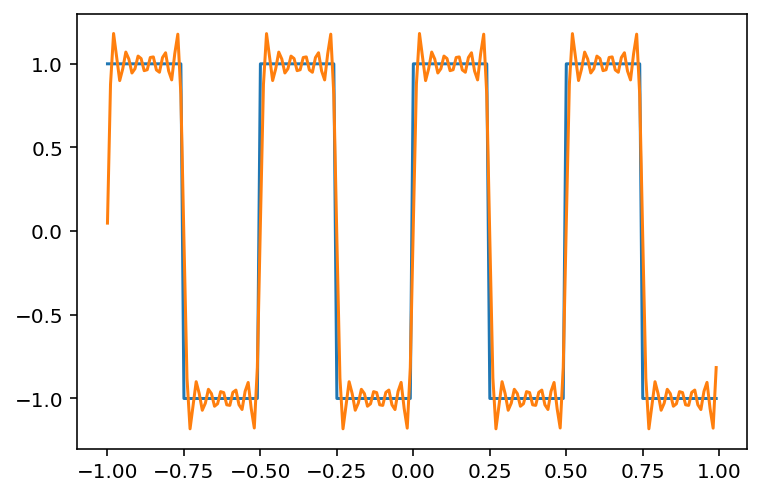

In [20]:
t = np.arange(-L/2, L/2, 0.001) # for proper integration L = 1
f = scipy.signal.square(2 * np.pi * 2 * t)

a = [0]
b = [0]

# get the coefficients for n = 1 .. to 15
for n in range(1, 26):
    a.append(2*simps(f*np.cos(2*np.pi*n*t/L), t))
    b.append(2*simps(f*np.sin(2*np.pi*n*t/L), t))


t = np.arange(-1, 1, 0.01) # for plotting
plt.plot(t, scipy.signal.square(2 * np.pi * 2 * t))

approx = 0.0 # our a0 offset
for n in range(1, 26):
    approx = approx + a[n]*np.cos(2*np.pi*n*t/L) + b[n]*np.sin(2*np.pi*n*t/L)
    
plt.plot(t, approx)
plt.show()

And let's again plot the size of the coefficients

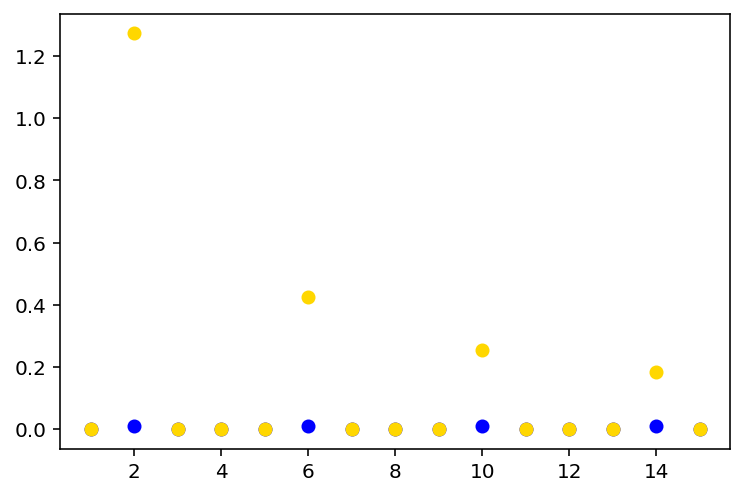

In [21]:
for n in range(1, 16):
    plt.scatter(n, a[n], color='blue')
    plt.scatter(n, b[n], color='gold')

plt.show()

### Summary

We can use a sum of cosine and sine contributions (i.e., a Fourier series) to approximate any periodic function.

$$
f(x)=\frac{a_{0}}{2}+\sum_{n=1}^{\infty} a_{n} \cos \left(\frac{2 \pi n x}{L}\right)+\sum_{n=1}^{\infty} b_{n} \sin \left(\frac{2 \pi n x}{L}\right)
$$

and the coefficients are defined by overlap integrals between the function and the relevant cosine or sine basis functions:

$$
a_{n}=\frac{2}{L} \int_{-\frac{L}{2}}^{\frac{L}{2}} f(x) \cos \left(\frac{2 \pi n x}{L}\right) d x \quad b_{n}=\frac{2}{L} \int_{-\frac{L}{2}}^{\frac{L}{2}} f(x) \sin \left(\frac{2 \pi n x}{L}\right) d x
$$

It's not hard to do this in a loop, but as we'll see on Monday, there's an efficient way to convert from a time-domain signal (i.e., the periodic function) into the coefficients for the Fourier series.

-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>